<a href="https://colab.research.google.com/github/fdelav/Analizis-saber-11/blob/main/pandas_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Creación y limpieza de base de datos

In [ ]:
# Lectura del csv para sacar los datos
df = pd.read_csv("/content/Saber_11__2020-2_20250728.csv")
# Creación de copia del data frame
df_copy = df.copy()
# Filtrar columnas que se utilizaran durante el análisis
df = df.filter(items=["ESTU_CONSECUTIVO", "ESTU_PAIS_RESIDE","ESTU_GENERO", "FAMI_ESTRATOVIVIENDA", "PUNT_GLOBAL"])
# Borrar datos nulos y duplicados
df = df.dropna()
df = df.drop_duplicates()


In [ ]:
df.head()

,ESTU_CONSECUTIVO,ESTU_PAIS_RESIDE,ESTU_GENERO,FAMI_ESTRATOVIVIENDA,PUNT_GLOBAL
0,SB11202040211436,SUIZA,F,Estrato 2,244
1,SB11202040433216,VENEZUELA,M,Estrato 3,238
2,SB11202040244180,VENEZUELA,F,Estrato 1,325
3,SB11202040210971,VENEZUELA,M,Sin Estrato,238
4,SB11202040235382,COLOMBIA,F,Estrato 5,202


In [ ]:
df.describe()

,PUNT_GLOBAL
count,487912.000000
mean,248.784291
std,48.410151
min,0.000000
25%,212.000000
50%,245.000000
75%,282.000000
max,500.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487912 entries, 0 to 504871
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ESTU_CONSECUTIVO      487912 non-null  object
 1   ESTU_PAIS_RESIDE      487912 non-null  object
 2   ESTU_GENERO           487912 non-null  object
 3   FAMI_ESTRATOVIVIENDA  487912 non-null  object
 4   PUNT_GLOBAL           487912 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 22.3+ MB


## Comparación con limpieza y sin limpieza
Para comprobar si la limpieza cambio los resultados de los análisis se comparo los datos limpios con los no limpios.

In [ ]:
# Comparación promedio
print("Comparación promedio puntaje")
print("con filtro", df['PUNT_GLOBAL'].mean())
print("sin filtro", df_copy['PUNT_GLOBAL'].mean())
print("diferencia filtro y sin filtro:", df['PUNT_GLOBAL'].mean()-df_copy['PUNT_GLOBAL'].mean())
# Comparación numero de participantes
print("\nComparación numero de participantes")
print("con filtro:", len(df))
print("sin filtro:", len(df_copy))
print("diferencia filtro y sin filtro:", len(df)-len(df_copy))

Comparación promedio puntaje
con filtro 248.78429101969206
sin filtro 248.34710183967422
diferencia filtro y sin filtro: 0.4371891800178389

Comparación numero de participantes
con filtro: 487912
sin filtro: 504872
diferencia filtro y sin filtro: -16960


Ya que posteriormente se hacen algunos análisis comparando los generos masculino y femenino, se hace un análisis más a fondo teniendo en cuenta el genero. Esto para ver si la limpieza perjudica o Beneficia a un genero.

In [ ]:
df_femenino = df[df['ESTU_GENERO'] == 'F']
df_copy_femenino = df_copy[df_copy['ESTU_GENERO'] == 'F']
df_masculino = df[df['ESTU_GENERO'] == 'M']
df_copy_masculino = df_copy[df_copy['ESTU_GENERO'] == 'M']
# comparación promedio
print("Comparación promedio puntaje femenino")
print("con filtro:", df_femenino['PUNT_GLOBAL'].mean())
print("sin filtro:", df_copy_femenino['PUNT_GLOBAL'].mean())
print("diferencia filtro y sin filtro:", df_femenino['PUNT_GLOBAL'].mean()-df_copy_femenino['PUNT_GLOBAL'].mean())
print("\nComparación promedio puntaje masculino")
print("con filtro:", df_masculino['PUNT_GLOBAL'].mean())
print("sin filtro:", df_copy_masculino['PUNT_GLOBAL'].mean())
print("diferencia filtro y sin filtro:", df_masculino['PUNT_GLOBAL'].mean()-df_copy_masculino['PUNT_GLOBAL'].mean())
# Comparación numero de participantes
print("\nComparación numero de participantes femeninos")
print("con filtro:", len(df_femenino))
print("sin filtro: ",len(df_copy_femenino))
print("diferencia filtro y sin filtro:", len(df_femenino)-len(df_copy_femenino))
print("\nComparación numero de participantes masculinos")
print("con filtro:", len(df_masculino))
print("sin filtro:", len(df_copy_masculino))
print("diferencia filtro y sin filtro:", len(df_masculino)-len(df_copy_masculino))


Comparación promedio puntaje femenino
con filtro: 245.61198891354206
sin filtro: 245.143091129977
diferencia filtro y sin filtro: 0.46889778356506895

Comparación promedio puntaje masculino
con filtro: 252.64113661341156
sin filtro: 252.2285274998686
diferencia filtro y sin filtro: 0.41260911354297036

Comparación numero de participantes femeninos
con filtro: 267714
sin filtro:  276572
diferencia filtro y sin filtro: -8858

Comparación numero de participantes masculinos
con filtro: 220198
sin filtro: 228292
diferencia filtro y sin filtro: -8094


## Visualización Tamaño del estrato
La cantidad de personas que participaron en cada estrato.

In [ ]:
df_gen_estra_glob = df.filter(items=["ESTU_GENERO", "FAMI_ESTRATOVIVIENDA"])
df_gen_estra_glob.value_counts(subset="FAMI_ESTRATOVIVIENDA")

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,182319
Estrato 1,152851
Estrato 3,103547
Estrato 4,23462
Sin Estrato,15631
Estrato 5,7019
Estrato 6,3083


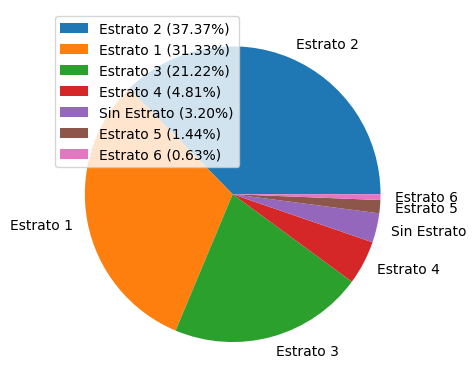

In [ ]:
plot = df_gen_estra_glob.value_counts(subset="FAMI_ESTRATOVIVIENDA", normalize=True).to_list()
labels = ['{0} ({1:.2f}%)'.format(i, j*100) for i, j in zip(["Estrato 2", "Estrato 1", "Estrato 3", "Estrato 4", "Sin Estrato", "Estrato 5", "Estrato 6"], plot)]
patches, texts = plt.pie(plot, labels=["Estrato 2", "Estrato 1", "Estrato 3", "Estrato 4", "Sin Estrato", "Estrato 5", "Estrato 6"])
plt.legend(patches, labels, loc="upper left")
plt.show()

In [ ]:
df_estrato = df.filter(items=["FAMI_ESTRATOVIVIENDA", "ESTU_PAIS_RESIDE", "COLE_AREA_UBICACION"])
df_sin_estrato = df_estrato[df_estrato['FAMI_ESTRATOVIVIENDA'] == "Sin Estrato"]
df_sin_estrato.value_counts(subset="ESTU_PAIS_RESIDE")

,count
ESTU_PAIS_RESIDE,
COLOMBIA,15410
VENEZUELA,208
ECUADOR,5
PERÚ,2
COSTA RICA,1
ESTADOS UNIDOS,1
PANAMÁ,1
URUGUAY,1
VIETNAM,1


## Comparación estrato-genero
Con el objetivo de ver si hay una disparidad entre los generos masculino y femenino, se hizo este análisis para comparar diferentes estadisticas entre los generos en los diferentes estratos.

### Inicialización de variables

In [ ]:
df_estrato1 = df[df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 1']
df_estrato2 = df[df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 2']
df_estrato3 = df[df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 3']
df_estrato4 = df[df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 4']
df_estrato5 = df[df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 5']
df_estrato6 = df[df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 6']
df_sin_estrato = df[df['FAMI_ESTRATOVIVIENDA'] == 'Sin Estrato']

In [ ]:
df_estrato1_femenino = df_estrato1[df_estrato1['ESTU_GENERO'] == 'F']
df_estrato1_masculino = df_estrato1[df_estrato1['ESTU_GENERO'] == 'M']

df_estrato2_femenino = df_estrato2[df_estrato2['ESTU_GENERO'] == 'F']
df_estrato2_masculino = df_estrato2[df_estrato2['ESTU_GENERO'] == 'M']

df_estrato3_femenino = df_estrato3[df_estrato3['ESTU_GENERO'] == 'F']
df_estrato3_masculino = df_estrato3[df_estrato3['ESTU_GENERO'] == 'M']

df_estrato4_femenino = df_estrato4[df_estrato4['ESTU_GENERO'] == 'F']
df_estrato4_masculino = df_estrato4[df_estrato4['ESTU_GENERO'] == 'M']

df_estrato5_femenino = df_estrato5[df_estrato5['ESTU_GENERO'] == 'F']
df_estrato5_masculino = df_estrato5[df_estrato5['ESTU_GENERO'] == 'M']

df_estrato6_femenino = df_estrato6[df_estrato6['ESTU_GENERO'] == 'F']
df_estrato6_masculino = df_estrato6[df_estrato6['ESTU_GENERO'] == 'M']

df_sin_estrato_femenino = df_sin_estrato[df_sin_estrato['ESTU_GENERO'] == 'F']
df_sin_estrato_masculino = df_sin_estrato[df_sin_estrato['ESTU_GENERO'] == 'M']

### Comparación numero de participantes
Se compara la cantidad de personas que participan por cada estrato dividiendolo en femenino y masculino.

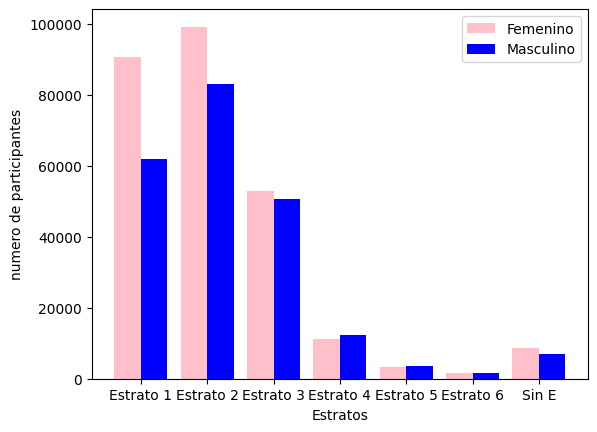

In [ ]:
estratos_femeninos_size = [len(df_estrato1_femenino),
                      len(df_estrato2_femenino),
                      len(df_estrato3_femenino),
                      len(df_estrato4_femenino),
                      len(df_estrato5_femenino),
                      len(df_estrato6_femenino),
                      len(df_sin_estrato_femenino)]
estratos_masculinos_size = [len(df_estrato1_masculino),
                       len(df_estrato2_masculino),
                       len(df_estrato3_masculino),
                       len(df_estrato4_masculino),
                       len(df_estrato5_masculino),
                       len(df_estrato6_masculino),
                       len(df_sin_estrato_masculino)]

bar_with = 0.4
x=np.arange(7)
plt.bar(x-0.2, estratos_femeninos_size, bar_with, color='pink')
plt.bar(x+0.2, estratos_masculinos_size, bar_with, color='blue')
plt.xticks(x, ["Estrato 1", "Estrato 2", "Estrato 3", "Estrato 4", "Estrato 5", "Estrato 6", "Sin E"])
plt.legend(["Femenino", "Masculino"])
plt.xlabel("Estratos")
plt.ylabel("numero de participantes")
plt.show()


In [ ]:
diferencia_porcentual_estrato1 = (len(df_estrato1_femenino) - len(df_estrato1_masculino))/len(df_estrato1_masculino)*100
diferencia_porcentual_estrato2 = (len(df_estrato2_femenino) - len(df_estrato2_masculino))/len(df_estrato2_masculino)*100
diferencia_porcentual_estrato3 = (len(df_estrato3_femenino) - len(df_estrato3_masculino))/len(df_estrato3_masculino)*100
diferencia_porcentual_estrato4 = (len(df_estrato4_femenino) - len(df_estrato4_masculino))/len(df_estrato4_masculino)*100
diferencia_porcentual_estrato5 = (len(df_estrato5_femenino) - len(df_estrato5_masculino))/len(df_estrato5_masculino)*100
diferencia_porcentual_estrato6 = (len(df_estrato6_femenino) - len(df_estrato6_masculino))/len(df_estrato6_masculino)*100
diferencia_porcentual_sin_estrato = (len(df_sin_estrato_femenino) - len(df_sin_estrato_masculino))/len(df_sin_estrato_masculino)*100
print(f"las mujeres tienen una diferencia con los hombres en el estrato 1 es del {round(diferencia_porcentual_estrato1, 2)}%")
print(f"las mujeres tienen una diferencia con los hombres en el estrato 2 es del {round(diferencia_porcentual_estrato2, 2)}%")
print(f"las mujeres tienen una diferencia con los hombres en el estrato 3 es del {round(diferencia_porcentual_estrato3, 2)}%")
print(f"las mujeres tienen una diferencia con los hombres en el estrato 4 es del {round(diferencia_porcentual_estrato4, 2)}%")
print(f"las mujeres tienen una diferencia con los hombres en el estrato 5 es del {round(diferencia_porcentual_estrato5, 2)}%")
print(f"las mujeres tienen una diferencia con los hombres en el estrato 6 es del {round(diferencia_porcentual_estrato6, 2)}%")
print(f"las mujeres tienen una diferencia con los hombres sin estrato es del {round(diferencia_porcentual_sin_estrato, 2)}%")



las mujeres tienen una diferencia con los hombres en el estrato 1 es del 46.42%
las mujeres tienen una diferencia con los hombres en el estrato 2 es del 19.44%
las mujeres tienen una diferencia con los hombres en el estrato 3 es del 4.53%
las mujeres tienen una diferencia con los hombres en el estrato 4 es del -9.3%
las mujeres tienen una diferencia con los hombres en el estrato 5 es del -7.65%
las mujeres tienen una diferencia con los hombres en el estrato 6 es del 2.43%
las mujeres tienen una diferencia con los hombres sin estrato es del 23.81%


### Comparación promedios
Se compara el promedio de cada estrato dividiendolo en masculino y femenino.

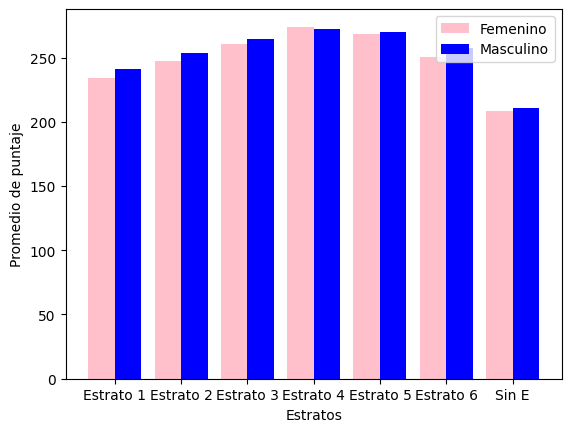

In [ ]:
estratos_masculinos_promedio = [df_estrato1_masculino['PUNT_GLOBAL'].mean(),
                                df_estrato2_masculino['PUNT_GLOBAL'].mean(),
                                df_estrato3_masculino['PUNT_GLOBAL'].mean(),
                                df_estrato4_masculino['PUNT_GLOBAL'].mean(),
                                df_estrato5_masculino['PUNT_GLOBAL'].mean(),
                                df_estrato6_masculino['PUNT_GLOBAL'].mean(),
                                df_sin_estrato_masculino['PUNT_GLOBAL'].mean()]
estratos_femenino_promedio = [df_estrato1_femenino['PUNT_GLOBAL'].mean(),
                                df_estrato2_femenino['PUNT_GLOBAL'].mean(),
                                df_estrato3_femenino['PUNT_GLOBAL'].mean(),
                                df_estrato4_femenino['PUNT_GLOBAL'].mean(),
                                df_estrato5_femenino['PUNT_GLOBAL'].mean(),
                                df_estrato6_femenino['PUNT_GLOBAL'].mean(),
                                df_sin_estrato_femenino['PUNT_GLOBAL'].mean()]
bar_with = 0.4
x=np.arange(7)
plt.bar(x-0.2, estratos_femenino_promedio, bar_with, color='pink')
plt.bar(x+0.2, estratos_masculinos_promedio, bar_with, color='blue')
plt.xticks(x, ["Estrato 1", "Estrato 2", "Estrato 3", "Estrato 4", "Estrato 5", "Estrato 6", "Sin E"])
plt.legend(["Femenino", "Masculino"])
plt.xlabel("Estratos")
plt.ylabel("Promedio de puntaje")
plt.show()

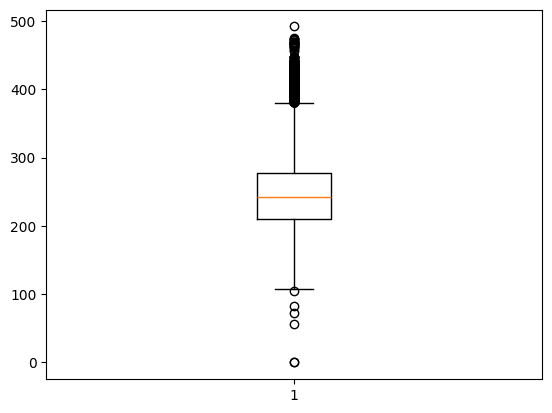

In [ ]:
df_femeninos = df[df['ESTU_GENERO'] == 'F' ]
df_masculinos = df[df['ESTU_GENERO'] == 'M' ]
promedios_femeninos = df_femeninos['PUNT_GLOBAL'].to_list()
plt.boxplot(promedios_femeninos)
plt.show()

##Comparación Urbano-Rural
Se quiere averiguar si existe una diferencia notable entre el puntaje promedio de estudiantes en zonas rurales o urbanas, además se va a analizar cómo el género afecta al puntaje e

In [ ]:
df_rural = df[df['COLE_AREA_UBICACION'] == 'RURAL']
df_urbano = df[df['COLE_AREA_UBICACION'] == 'URBANO']

In [ ]:
df_rural_femenino = df_rural[df_rural['ESTU_GENERO'] == 'F']
df_rural_masculino = df_rural[df_rural['ESTU_GENERO'] == 'M']
df_urbano_femenino = df_urbano[df_urbano['ESTU_GENERO'] == 'F']
df_urbano_masculino = df_urbano[df_urbano['ESTU_GENERO'] == 'M']

In [ ]:
tipo_femenino_size = [len(df_rural_femenino), len(df_urbano_femenino)]
tipo_masculino_size = [len(df_rural_masculino), len(df_urbano_masculino)]

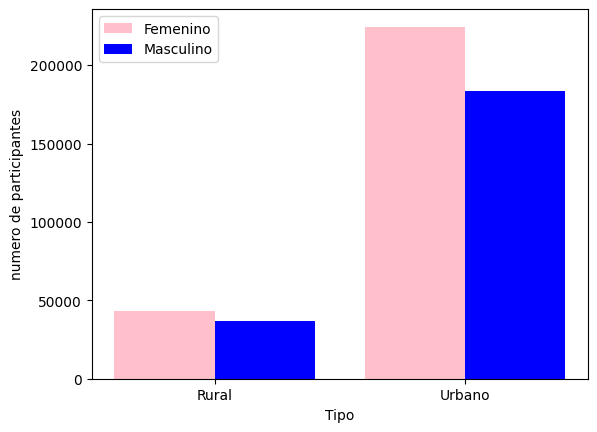

In [ ]:
bar_with = 0.4
x=np.arange(2)
plt.bar(x-0.2, tipo_femenino_size, bar_with, color='pink')
plt.bar(x+0.2, tipo_masculino_size, bar_with, color='blue')
plt.xticks(x, ["Rural", "Urbano"])
plt.legend(["Femenino", "Masculino"])
plt.xlabel("Tipo")
plt.ylabel("numero de participantes")
plt.show()

In [ ]:
porcentaje_rural = len(df_rural)*100/len(df)
print(porcentaje_rural)
porcentaje_urbano = len(df_urbano)*100/len(df)
print(porcentaje_urbano)

16.373444391611603
83.6265556083884


In [ ]:
tipo_femenino_promedio = [df_rural_femenino['PUNT_GLOBAL'].mean(), df_urbano_femenino['PUNT_GLOBAL'].mean()]
tipo_masculino_promedio = [df_rural_masculino['PUNT_GLOBAL'].mean(), df_urbano_masculino['PUNT_GLOBAL'].mean()]
print(tipo_femenino_promedio)
print(tipo_masculino_promedio)

[np.float64(225.84759679881574), np.float64(249.41853617248753)]
[np.float64(229.56525890762262), np.float64(257.24942248180275)]


La diferencia en el puntaje de las mujeres en zonas urbanas y rurales es de 24 puntos.

En hombres es de 28 puntos.

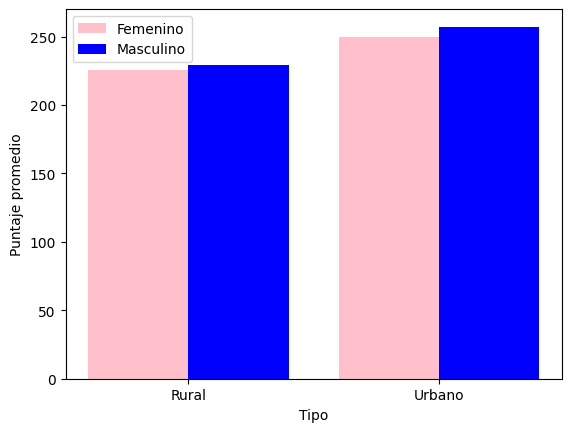

In [ ]:
bar_with = 0.4
x=np.arange(2)
plt.bar(x-0.2, tipo_femenino_promedio, bar_with, color='pink')
plt.bar(x+0.2, tipo_masculino_promedio, bar_with, color='blue')
plt.xticks(x, ["Rural", "Urbano"])
plt.legend(["Femenino", "Masculino"])
plt.xlabel("Tipo")
plt.ylabel("Puntaje promedio")
plt.show()

##Análisis Percentil
Ahora se va a analizar el 10% de puntajes más altos para buscar si existe una disparidad mayor en estos puntajes, entre zonas urbanas y rurales y género de los estudiantes.

In [ ]:
percentil_tipos = df.sort_values(by = 'PUNT_GLOBAL', ascending = False)
percentil_10_tipos = percentil_tipos.head(487912//10)
percentil_10_urbano = percentil_10_tipos[percentil_10_tipos['COLE_AREA_UBICACION'] == 'URBANO']
percentil_10_rural = percentil_10_tipos[percentil_10_tipos['COLE_AREA_UBICACION'] == 'RURAL']
percentil_tipos_valor = percentil_tipos['PUNT_GLOBAL'].quantile(0.9)
print(percentil_tipos_valor)

315.0


In [ ]:
percentil_10_urbano_femenino = percentil_10_urbano[percentil_10_urbano['ESTU_GENERO'] == 'F']
percentil_10_urbano_masculino = percentil_10_urbano[percentil_10_urbano['ESTU_GENERO'] == 'M']
percentil_10_rural_femenino = percentil_10_rural[percentil_10_rural['ESTU_GENERO'] == 'F']
percentil_10_rural_masculino = percentil_10_rural[percentil_10_rural['ESTU_GENERO'] == 'M']

In [ ]:
percentil_femenino = [percentil_10_rural_femenino['PUNT_GLOBAL'].mean(),percentil_10_urbano_femenino['PUNT_GLOBAL'].mean()]
percentil_masculino = [percentil_10_rural_masculino['PUNT_GLOBAL'].mean(),percentil_10_urbano_masculino['PUNT_GLOBAL'].mean()]

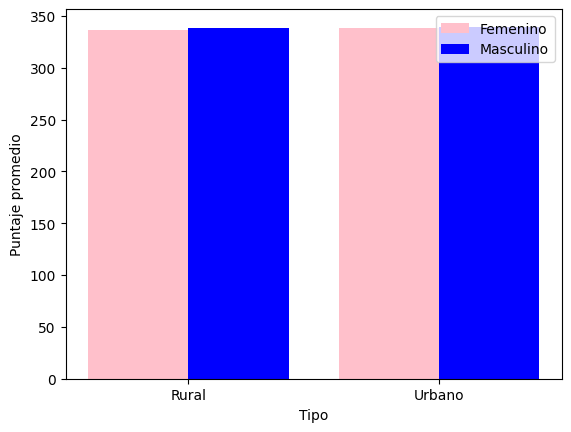

In [ ]:
bar_with = 0.4
x=np.arange(2)
plt.bar(x-0.2, percentil_femenino, bar_with, color='pink')
plt.bar(x+0.2, percentil_masculino, bar_with, color='blue')
plt.xticks(x, ["Rural", "Urbano"])
plt.legend(["Femenino", "Masculino"])
plt.xlabel("Tipo")
plt.ylabel("Puntaje promedio")
plt.show()

Se puede evidenciar que el promedio de puntaje entre los diferentes grupos es bastante similar, entonces se procede a analizar las proporciones.

In [ ]:
print(len(percentil_10_rural))
print(len(percentil_10_urbano))

3257
45534


In [ ]:
porcentaje_10_rural = len(percentil_10_rural)*100/len(percentil_10_tipos)
print(porcentaje_10_rural)
porcentaje_10_urbano = len(percentil_10_urbano)*100/len(percentil_10_tipos)
print(porcentaje_10_urbano)

6.675411448832777
93.32458855116722


A pesar de que la proporción total de estudiantes de zonas rurales 16.37% solo un 6.67% de los estudiantes con el puntaje más alto son de zonas rurales, esto es una disparidad enorme.

In [ ]:
percentil_rural = df_rural.sort_values(by = 'PUNT_GLOBAL', ascending = False)
percentil_urbano = df_urbano.sort_values(by = 'PUNT_GLOBAL', ascending = False)

In [ ]:
percentil_genero = df.sort_values(by = 'PUNT_GLOBAL', ascending = False)
percentil_10_genero = percentil_tipos.head(487912//10)
percentil_10_masculino = percentil_10_tipos[percentil_10_tipos['ESTU_GENERO'] == 'M']
percentil_10_femenino = percentil_10_tipos[percentil_10_tipos['ESTU_GENERO'] == 'F']
percentil_genero_valor = percentil_tipos['PUNT_GLOBAL'].quantile(0.9)

In [ ]:
print(len(percentil_10_masculino))
print(len(percentil_10_femenino))

25617
23174


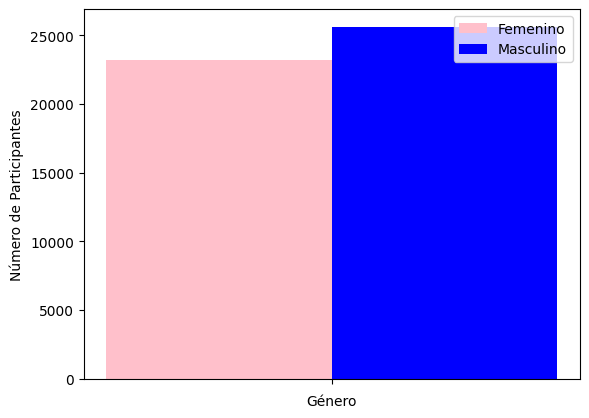

In [ ]:
bar_with = 0.4
x=np.arange(1)
plt.bar(x-0.2, len(percentil_10_femenino), bar_with, color='pink')
plt.bar(x+0.2, len(percentil_10_masculino), bar_with, color='blue')
plt.xticks(x, [])
plt.legend(["Femenino", "Masculino"])
plt.ylabel("Número de Participantes")
plt.xlabel("Género")
plt.show()

##**Comparación puntajes por país de residencia**

Generar un análisis visual comparativo del rendimiento académico promedio de estudiantes en diferentes países seleccionados, mostrando además el número de participantes por país.

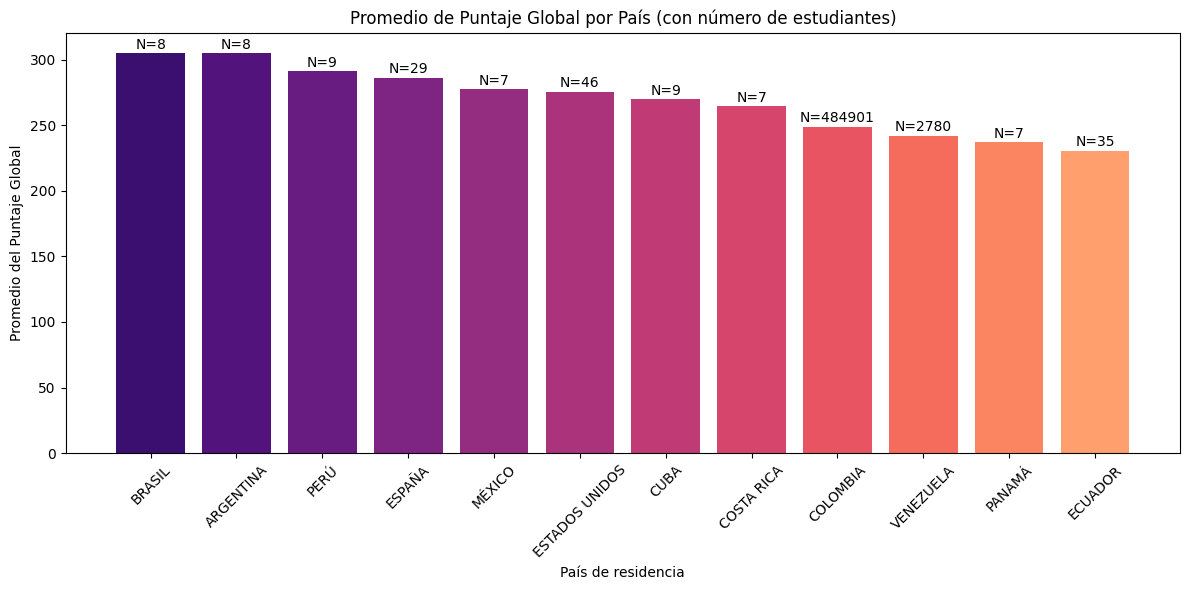

In [ ]:
# Lista de países de interés
paises_deseados = [
    "VENEZUELA", "ESTADOS UNIDOS", "ECUADOR", "ESPAÑA", "CUBA",
    "PERÚ", "ARGENTINA", "BRASIL", "COSTA RICA", "PANAMÁ",
    "MÉXICO", "COLOMBIA"
]

# Filtrar el DataFrame
df_filtrado = df[df["ESTU_PAIS_RESIDE"].isin(paises_deseados)]

# Agrupar por país y calcular promedio y cantidad
resumen = (
    df_filtrado
    .groupby("ESTU_PAIS_RESIDE")
    .agg(
        promedio=("PUNT_GLOBAL", "mean"),
        cantidad=("PUNT_GLOBAL", "count")
    )
    .sort_values(by="promedio", ascending=False)
    .reset_index()
)

# Datos para el gráfico
paises = resumen["ESTU_PAIS_RESIDE"]
promedios = resumen["promedio"]
cantidades = resumen["cantidad"]

# Crear colores con la paleta magma
colores = plt.cm.magma(np.linspace(0.2, 0.8, len(paises)))

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
barras = plt.bar(paises, promedios, color=colores)

# Añadir etiquetas con número de estudiantes sobre cada barra
for i, (valor, cantidad) in enumerate(zip(promedios, cantidades)):
    plt.text(i, valor + 1, f"N={cantidad}", ha="center", va="bottom", fontsize=10)

# Personalización
plt.title("Promedio de Puntaje Global por País (con número de estudiantes)")
plt.xlabel("País de residencia")
plt.ylabel("Promedio del Puntaje Global")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
